**In this experiment, we evaluate the performance of different optimization algorithms, including 'Adagrad', 'Adadelta', 'SGD', 'RMSprop', and 'Adam', on the MNIST dataset. The goal is to determine which optimizer achieves the optimal balance between training speed and classification accuracy. Each optimizer is applied to train a deep learning model on the MNIST dataset, and their performances are compared based on both speed of convergence during training and the resulting accuracy on the test set.**

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_test.shape

(10000, 28, 28)

In [23]:
x_test.dtype

dtype('uint8')

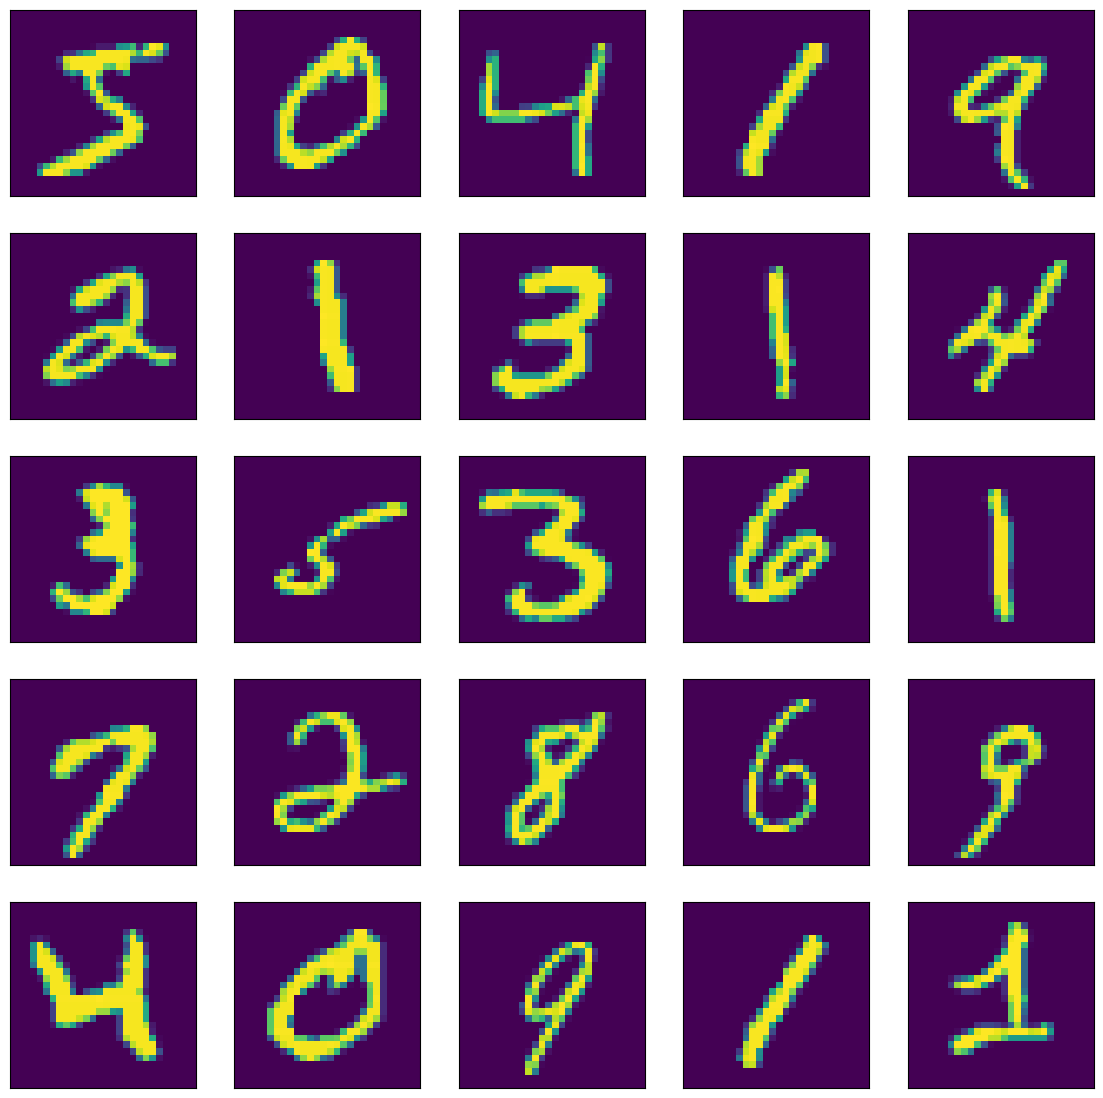

In [24]:
plt.figure(figsize=(14,14))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], )
plt.show()

In [25]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)
x_train = x_train/255.0
x_test = x_test/255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [26]:
# Model Building - MLP

def model_building(optimizer):
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(128,activation='relu',input_shape=input_shape))
  # input_dim = tabular data, input_shape=image data
  model.add(Dense(128,activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])
  return model

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [29]:
optimizers = ['Adagrad','Adadelta','SGD','RMSprop','Adam']

for i in optimizers:
  model = model_building(i)
  print(i)
  history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stopping])
  print()
  print()

Adagrad
Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 2.0241 - accuracy: 0.4413 - val_loss: 1.6662 - val_accuracy: 0.6914
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 1.3451 - accuracy: 0.7488 - val_loss: 1.0354 - val_accuracy: 0.8082
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.8940 - accuracy: 0.8175 - val_loss: 0.7421 - val_accuracy: 0.8421
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.6895 - accuracy: 0.8450 - val_loss: 0.6040 - val_accuracy: 0.8616
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.5841 - accuracy: 0.8597 - val_loss: 0.5260 - val_accuracy: 0.8747
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.5206 - accuracy: 0.8695 - val_loss: 0.4765 - val_accuracy: 0.8812
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.4781 - accuracy: 0.8769 - val_loss: 0.4422 - val_accuracy

# Adagrad : 469/469 [==============================] - 2s 3ms/step - loss: 0.1802 - accuracy: 0.9493 - val_loss: 0.1819 - val_accuracy: 0.9469

# Adadelta : 469/469 [==============================] - 2s 3ms/step - loss: 0.3750 - accuracy: 0.8997 - val_loss: 0.3557 - val_accuracy: 0.9066

# SGD : 469/469 [==============================] - 2s 4ms/step - loss: 0.0424 - accuracy: 0.9890 - val_loss: 0.0801 - val_accuracy: 0.9754

# RMSprop : 469/469 [==============================] - 2s 4ms/step - loss: 0.0164 - accuracy: 0.9949 - val_loss: 0.0878 - val_accuracy: 0.9775

# Adam : 469/469 [==============================] - 2s 4ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.0921 - val_accuracy: 0.9769

# conclusion : Adam is the best optimization method comparing other optimization techniques